读入世界货币基金组织数据集

In [46]:
import pandas as pd
import numpy as np
df = pd.read_csv("./data/WEOOct2022all.csv",thousands=',')
df

,WEO Country/Region Code,ISO,WEO Subject Code,Country/Region,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,Estimates Start After
0,512,AFG,NGDP_R,Afghanistan,"Gross domestic product, constant prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,"1,319.90","1,288.87",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
1,512,AFG,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,NaN,"See notes for: Gross domestic product, consta...",NaN,...,3.912,-2.351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
2,512,AFG,NGDP,Afghanistan,"Gross domestic product, current prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,"1,469.60","1,547.29",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
3,512,AFG,NGDPD,Afghanistan,"Gross domestic product, current prices",Values are based upon GDP in national currency...,U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,...,18.876,20.136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
4,512,AFG,PPPGDP,Afghanistan,"Gross domestic product, current prices",These data form the basis for the country weig...,Purchasing power parity; international dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,...,81.873,80.912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8619,698,ZWE,GGXWDG,Zimbabwe,General government gross debt,Gross debt consists of all liabilities that re...,National currency,Billions,Source: Ministry of Finance or Treasury Latest...,NaN,...,174.699,"1,218.76","1,947.91","13,347.46","27,224.17","41,501.09","52,964.56","60,566.34","67,806.72",2019.0
8620,698,ZWE,GGXWDG_NGDP,Zimbabwe,General government gross debt,Gross debt consists of all liabilities that re...,Percent of GDP,NaN,See notes for: General government gross debt ...,NaN,...,93.213,102.491,66.913,92.635,64.872,57.489,54.497,53.13,51.395,2019.0
8621,698,ZWE,NGDP_FY,Zimbabwe,Gross domestic product corresponding to fiscal...,Gross domestic product corresponding to fiscal...,National currency,Billions,Source: Ministry of Finance or Treasury Latest...,NaN,...,187.419,"1,189.14","2,911.11","14,408.63","41,965.70","72,190.13","97,188.08","113,996.38","131,931.52",2019.0
8622,698,ZWE,BCA,Zimbabwe,Current account balance,Current account is all transactions other than...,U.S. dollars,Billions,Source: Reserve Bank of Zimbabwe and Ministry ...,-0.301,...,0.92,0.678,0.348,0.215,0.096,0.149,0.206,0.237,0.201,2020.0


计算总行数并提取列名

In [47]:
row_count = df.shape[0]
d_f_notnull = df.count()
d_f_list = df.columns
row_count

8624

查看统计信息并将每个字段的非空数据个数转为字典形式

In [48]:
df.info()
d_f_notnull_dict = d_f_notnull.to_dict()
d_f_notnull_dict

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8624 entries, 0 to 8623
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   WEO Country/Region Code        8624 non-null   int64  
 1   ISO                            8624 non-null   object 
 2   WEO Subject Code               8624 non-null   object 
 3   Country/Region                 8624 non-null   object 
 4   Subject Descriptor             8624 non-null   object 
 5   Subject Notes                  8624 non-null   object 
 6   Units                          8624 non-null   object 
 7   Scale                          3920 non-null   object 
 8   Country/Series-specific Notes  7641 non-null   object 
 9   1980                           3886 non-null   object 
 10  1981                           4007 non-null   object 
 11  1982                           4050 non-null   object 
 12  1983                           4091 non-null   o

{'WEO Country/Region Code': 8624,
 'ISO': 8624,
 'WEO Subject Code': 8624,
 'Country/Region': 8624,
 'Subject Descriptor': 8624,
 'Subject Notes': 8624,
 'Units': 8624,
 'Scale': 3920,
 'Country/Series-specific Notes': 7641,
 '1980': 3886,
 '1981': 4007,
 '1982': 4050,
 '1983': 4091,
 '1984': 4117,
 '1985': 4194,
 '1986': 4241,
 '1987': 4265,
 '1988': 4354,
 '1989': 4415,
 '1990': 4903,
 '1991': 5059,
 '1992': 5443,
 '1993': 5637,
 '1994': 5764,
 '1995': 6106,
 '1996': 6246,
 '1997': 6411,
 '1998': 6583,
 '1999': 6670,
 '2000': 7082,
 '2001': 7221,
 '2002': 7319,
 '2003': 7353,
 '2004': 7429,
 '2005': 7462,
 '2006': 7469,
 '2007': 7471,
 '2008': 7482,
 '2009': 7503,
 '2010': 7515,
 '2011': 7517,
 '2012': 7533,
 '2013': 7549,
 '2014': 7575,
 '2015': 7593,
 '2016': 7595,
 '2017': 7599,
 '2018': 7596,
 '2019': 7594,
 '2020': 7593,
 '2021': 7510,
 '2022': 7443,
 '2023': 7421,
 '2024': 7337,
 '2025': 7337,
 '2026': 7337,
 '2027': 7337,
 'Estimates Start After': 7641}

In [49]:
df.describe()

,WEO Country/Region Code,Estimates Start After
count,8624.000000,7641.000000
mean,551.377551,2020.274702
std,261.497924,1.888114
min,111.000000,2003.000000
25%,313.750000,2020.000000
50%,565.500000,2021.000000
75%,733.250000,2021.000000
max,968.000000,2022.000000


计算每个字段的空值占比，将空值占比大于50%的全部删除，剩余的加入新的DataFrame

In [50]:
df1 = pd.DataFrame()
for feature in d_f_list:
    not_null_count = d_f_notnull_dict[feature]
    null_rate = 1-(not_null_count/row_count)
    if null_rate < 0.5 :
        df1[feature] = df[feature]
df1

,WEO Country/Region Code,ISO,WEO Subject Code,Country/Region,Subject Descriptor,Subject Notes,Units,Country/Series-specific Notes,1988,1989,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,Estimates Start After
0,512,AFG,NGDP_R,Afghanistan,"Gross domestic product, constant prices",Expressed in billions of national currency uni...,National currency,Source: National Statistics Office Latest actu...,NaN,NaN,...,"1,319.90","1,288.87",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
1,512,AFG,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,"See notes for: Gross domestic product, consta...",NaN,NaN,...,3.912,-2.351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
2,512,AFG,NGDP,Afghanistan,"Gross domestic product, current prices",Expressed in billions of national currency uni...,National currency,Source: National Statistics Office Latest actu...,NaN,NaN,...,"1,469.60","1,547.29",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
3,512,AFG,NGDPD,Afghanistan,"Gross domestic product, current prices",Values are based upon GDP in national currency...,U.S. dollars,"See notes for: Gross domestic product, curren...",NaN,NaN,...,18.876,20.136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
4,512,AFG,PPPGDP,Afghanistan,"Gross domestic product, current prices",These data form the basis for the country weig...,Purchasing power parity; international dollars,"See notes for: Gross domestic product, curren...",NaN,NaN,...,81.873,80.912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8619,698,ZWE,GGXWDG,Zimbabwe,General government gross debt,Gross debt consists of all liabilities that re...,National currency,Source: Ministry of Finance or Treasury Latest...,NaN,NaN,...,174.699,"1,218.76","1,947.91","13,347.46","27,224.17","41,501.09","52,964.56","60,566.34","67,806.72",2019.0
8620,698,ZWE,GGXWDG_NGDP,Zimbabwe,General government gross debt,Gross debt consists of all liabilities that re...,Percent of GDP,See notes for: General government gross debt ...,NaN,NaN,...,93.213,102.491,66.913,92.635,64.872,57.489,54.497,53.13,51.395,2019.0
8621,698,ZWE,NGDP_FY,Zimbabwe,Gross domestic product corresponding to fiscal...,Gross domestic product corresponding to fiscal...,National currency,Source: Ministry of Finance or Treasury Latest...,NaN,NaN,...,187.419,"1,189.14","2,911.11","14,408.63","41,965.70","72,190.13","97,188.08","113,996.38","131,931.52",2019.0
8622,698,ZWE,BCA,Zimbabwe,Current account balance,Current account is all transactions other than...,U.S. dollars,Source: Reserve Bank of Zimbabwe and Ministry ...,0.05,-0.079,...,0.92,0.678,0.348,0.215,0.096,0.149,0.206,0.237,0.201,2020.0


对subject descripitor 进行取值的类型统计

In [51]:
df1[['Subject Notes','Subject Descriptor']].value_counts()

Subject Notes                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

取出代表GDP指标的表项，可以得到一个各国历年GDP数值的表格

In [52]:

dfGDP = pd.DataFrame(columns=df1.columns)
for i in range(df1.shape[0]):
    if df1['WEO Subject Code'].loc[i] == 'NGDPRPPPPC':
        dfGDP.loc[len(dfGDP.index)] = df1.loc[i]

dfGDP


,WEO Country/Region Code,ISO,WEO Subject Code,Country/Region,Subject Descriptor,Subject Notes,Units,Country/Series-specific Notes,1988,1989,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,Estimates Start After
0,512,AFG,NGDPRPPPPC,Afghanistan,"Gross domestic product per capita, constant pr...",GDP is expressed in constant international dol...,Purchasing power parity; 2017 international do...,"See notes for: Gross domestic product, consta...",NaN,NaN,...,"2,439.68","2,328.76",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.0
1,914,ALB,NGDPRPPPPC,Albania,"Gross domestic product per capita, constant pr...",GDP is expressed in constant international dol...,Purchasing power parity; 2017 international do...,"See notes for: Gross domestic product, consta...","5,392.59","5,764.04",...,"13,862.63","13,394.46","14,559.68","15,176.70","15,599.44","16,148.12","16,718.77","17,345.89","18,000.73",2020.0
2,612,DZA,NGDPRPPPPC,Algeria,"Gross domestic product per capita, constant pr...",GDP is expressed in constant international dol...,Purchasing power parity; 2017 international do...,"See notes for: Gross domestic product, consta...","8,882.79","9,083.03",...,"11,434.87","10,746.03","10,969.25","11,323.13","11,454.28","11,519.13","11,571.31","11,627.29","11,661.52",2019.0
3,171,AND,NGDPRPPPPC,Andorra,"Gross domestic product per capita, constant pr...",GDP is expressed in constant international dol...,Purchasing power parity; 2017 international do...,"See notes for: Gross domestic product, consta...",NaN,NaN,...,"56,330.95","49,728.24","53,143.21","55,554.98","55,583.13","55,829.37","55,912.42","55,776.22","55,530.93",2021.0
4,614,AGO,NGDPRPPPPC,Angola,"Gross domestic product per capita, constant pr...",GDP is expressed in constant international dol...,Purchasing power parity; 2017 international do...,"See notes for: Gross domestic product, consta...","2,974.02","2,895.84",...,"7,084.18","6,482.35","6,344.15","6,335.91","6,362.17","6,416.25","6,480.06","6,549.51","6,608.36",2017.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,582,VNM,NGDPRPPPPC,Vietnam,"Gross domestic product per capita, constant pr...",GDP is expressed in constant international dol...,Purchasing power parity; 2017 international do...,"See notes for: Gross domestic product, consta...","1,916.31","2,025.15",...,"10,131.71","10,312.54","10,479.70","11,111.57","11,692.57","12,354.54","13,076.87","13,852.30","14,692.12",2020.0
192,487,WBG,NGDPRPPPPC,West Bank and Gaza,"Gross domestic product per capita, constant pr...",GDP is expressed in constant international dol...,Purchasing power parity; 2017 international do...,"See notes for: Gross domestic product, consta...",NaN,NaN,...,"5,879.79","5,087.06","5,314.41","5,400.02","5,462.49","5,469.19","5,459.45","5,452.40","5,448.00",2021.0
193,474,YEM,NGDPRPPPPC,Yemen,"Gross domestic product per capita, constant pr...",GDP is expressed in constant international dol...,Purchasing power parity; 2017 international do...,"See notes for: Gross domestic product, consta...",NaN,NaN,...,"2,097.44","1,876.94","1,818.16","1,815.48","1,835.91","1,924.91","2,009.72","2,089.38","2,162.91",2018.0
194,754,ZMB,NGDPRPPPPC,Zambia,"Gross domestic product per capita, constant pr...",GDP is expressed in constant international dol...,Purchasing power parity; 2017 international do...,"See notes for: Gross domestic product, consta...","2,661.39","2,487.76",...,"3,383.31","3,191.37","3,239.65","3,236.21","3,268.17","3,307.09","3,359.12","3,417.66","3,485.58",2019.0


这一单元主要计算了各国的GDP平均增长率，并且选出了几个具有代表性的发展中国家（以及美国）进行图像的绘制

<Figure size 1200x1000 with 0 Axes>

findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.


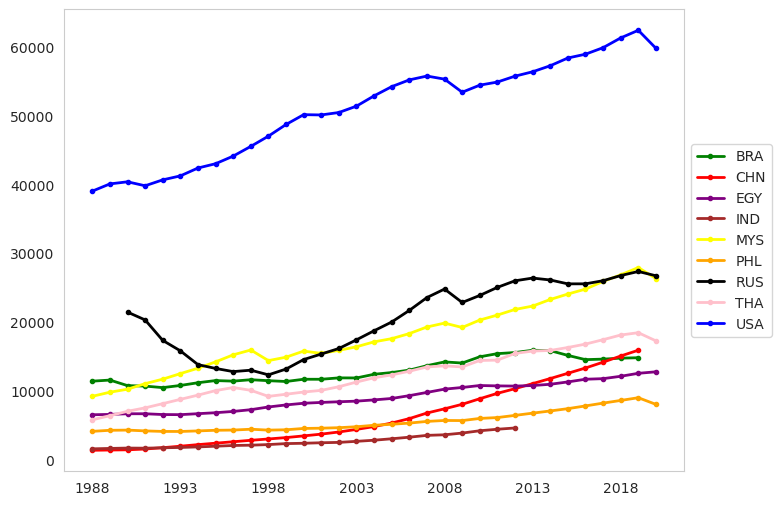

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'The Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Democratic Republic of the Congo', 'Republic of Congo', 'Costa Rica', "C魌e d'Ivoire", 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'The Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hong Kong SAR', 'Hungary', 'Iceland', '

In [53]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.ticker as ticker

matplotlib.rc("font",family='SimHei')
matplotlib.rcParams['axes.unicode_minus']=False
GDPRate = []
s_ = np.array([])
temp = 0
country_list = []
ISO_list = []
NaN = dfGDP['1988'].loc[0]
plt.figure(figsize=(12, 10))
fig,ax = plt.subplots(figsize=(8,6))
for i in range(dfGDP.shape[0]):
    s = 1988
    while s<2028 :
        temp = dfGDP[str(s)].loc[i]
        if isinstance(temp,str):
            temp = float(temp.replace(',', ''))
        if np.isnan(temp) :
            s+=1
        else:
            break
    name = dfGDP['ISO'].loc[i]
    countryName = dfGDP['Country/Region'].loc[i]
    country_list.append(countryName)
    ISO_list.append(name)
    if s == 2028:
        GDPRate.append(0)
        continue
    s_ = np.array([])
    y_ = np.array([])
    for j in range(s,int(dfGDP['Estimates Start After'].loc[i])):
        s_ = np.append(s_,float(dfGDP[str(j)].loc[i].replace(',', '')))
        y_ = np.append(y_,str(j))
    if name == 'USA':
        plt.plot(y_, s_, color='blue',marker='.',  linewidth=2 , label=name)
        plt.legend(loc='center left',bbox_to_anchor=(1,0.5))
    if name == 'CHN':
        plt.plot(y_, s_, color='red',marker='.',  linewidth=2, label=name)
        plt.legend(loc='center left',bbox_to_anchor=(1,0.5))
    if name == 'MYS':
        plt.plot(y_, s_, color='yellow',marker='.',  linewidth=2, label=name)
        plt.legend(loc='center left',bbox_to_anchor=(1,0.5))
    if name == 'BRA':
        plt.plot(y_, s_, color='green',marker='.',  linewidth=2, label=name)
        plt.legend(loc='center left',bbox_to_anchor=(1,0.5))
    if name == 'EGY':
        plt.plot(y_, s_, color='purple',marker='.', linewidth=2, label=name)
        plt.legend(loc='center left',bbox_to_anchor=(1,0.5))
    if name == 'IND':
        plt.plot(y_, s_, color='brown',marker='.',  linewidth=2, label=name)
        plt.legend(loc='center left',bbox_to_anchor=(1,0.5))
    if name == 'PHL':
        plt.plot(y_, s_, color='orange',marker='.',  linewidth=2, label=name)
        plt.legend(loc='center left',bbox_to_anchor=(1,0.5))
    if name == 'RUS':
        plt.plot(y_, s_, color='black',marker='.',  linewidth=2, label=name)
        plt.legend(loc='center left',bbox_to_anchor=(1,0.5))
    if name == 'THA':
        plt.plot(y_, s_, color='pink',marker='.',  linewidth=2, label=name)
        plt.legend(loc='center left',bbox_to_anchor=(1,0.5))
    if s_.size != 0:
        GDPRate.append(((s_[-1] - s_[0]) / s_.size)/s_[0])
    else:
        GDPRate.append(0)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.xlabel('年份')
plt.ylabel('GDP')
plt.grid(False)
plt.show()

print(country_list,ISO_list)

In [54]:
len(ISO_list)

196

提取所有指标类型

In [55]:
df_list = df1['WEO Subject Code'].unique()
df_list = list(df_list)
df_list

['NGDP_R',
 'NGDP_RPCH',
 'NGDP',
 'NGDPD',
 'PPPGDP',
 'NGDP_D',
 'NGDPRPC',
 'NGDPRPPPPC',
 'NGDPPC',
 'NGDPDPC',
 'PPPPC',
 'NGAP_NPGDP',
 'PPPSH',
 'PPPEX',
 'NID_NGDP',
 'NGSD_NGDP',
 'PCPI',
 'PCPIPCH',
 'PCPIE',
 'PCPIEPCH',
 'TM_RPCH',
 'TMG_RPCH',
 'TX_RPCH',
 'TXG_RPCH',
 'LUR',
 'LE',
 'LP',
 'GGR',
 'GGR_NGDP',
 'GGX',
 'GGX_NGDP',
 'GGXCNL',
 'GGXCNL_NGDP',
 'GGSB',
 'GGSB_NPGDP',
 'GGXONLB',
 'GGXONLB_NGDP',
 'GGXWDN',
 'GGXWDN_NGDP',
 'GGXWDG',
 'GGXWDG_NGDP',
 'NGDP_FY',
 'BCA',
 'BCA_NGDPD']

建”世界各国的所有经济指标表格（2020）“

In [56]:
df_list_1 = ['ISO3','Country/Region','GDPMeanGrowingRate'] + df_list + ['RenewableEnergy']
df_eco = pd.DataFrame(columns=df_list_1)
df_eco['ISO3'] = ISO_list
df_eco['Country/Region'] = country_list
df_eco['GDPMeanGrowingRate'] = GDPRate
df_eco

,ISO3,Country/Region,GDPMeanGrowingRate,NGDP_R,NGDP_RPCH,NGDP,NGDPD,PPPGDP,NGDP_D,NGDPRPC,...,GGXONLB,GGXONLB_NGDP,GGXWDN,GGXWDN_NGDP,GGXWDG,GGXWDG_NGDP,NGDP_FY,BCA,BCA_NGDPD,RenewableEnergy
0,AFG,Afghanistan,0.038718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ALB,Albania,0.049084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DZA,Algeria,0.009674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AND,Andorra,-0.016145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AGO,Angola,0.057477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,VNM,Vietnam,0.133972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,WBG,West Bank and Gaza,0.009650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,YEM,Yemen,-0.012389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,ZMB,Zambia,0.009414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


将各个字段的值按照2020的值或者估值放入表中

In [57]:
for i in range(df1.shape[0]):
    if np.isnan(df1['Estimates Start After'].loc[i]):
        continue
    last_valid = str(2020)
    col_name = df1['WEO Subject Code'].loc[i]
    countryISO = df1['ISO'].loc[i]
    row_index = df_eco[df_eco.ISO3 == countryISO].index.tolist()[0]
    df_eco[col_name].loc[row_index] = df1[last_valid].loc[i]
df_eco

C:\Users\wythedee\AppData\Local\Temp\ipykernel_19236\1282190021.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eco[col_name].loc[row_index] = df1[last_valid].loc[i]


,ISO3,Country/Region,GDPMeanGrowingRate,NGDP_R,NGDP_RPCH,NGDP,NGDPD,PPPGDP,NGDP_D,NGDPRPC,...,GGXONLB,GGXONLB_NGDP,GGXWDN,GGXWDN_NGDP,GGXWDG,GGXWDG_NGDP,NGDP_FY,BCA,BCA_NGDPD,RenewableEnergy
0,AFG,Afghanistan,0.038718,"1,288.87",-2.351,"1,547.29",20.136,80.912,120.05,"39,127.08",...,-34.131,-2.206,NaN,NaN,114.461,7.397,"1,547.29",2.247,11.157,NaN
1,ALB,Albania,0.049084,808.617,-3.482,"1,644.08",15.161,40.658,203.32,"280,984.50",...,-75.98,-4.621,"1,149.16",69.897,"1,248.30",75.927,"1,644.08",-1.315,-8.677,NaN
2,DZA,Algeria,0.009674,"7,156.87",-5.1,"18,383.80",144.922,497.03,256.869,"163,208.89",...,"-2,142.61",-11.655,"8,098.51",44.052,"9,609.71",52.273,"18,383.80",-18.711,-12.911,NaN
3,AND,Andorra,-0.016145,2.375,-11.184,2.531,2.885,4.092,106.557,"30,447.35",...,NaN,NaN,NaN,NaN,1.173,46.329,2.531,0.422,14.634,NaN
4,AGO,Angola,0.057477,"1,465.30",-5.75,"33,611.36",58.125,212.172,"2,293.82","47,219.95",...,"1,661.67",4.944,NaN,NaN,"45,892.99",136.54,"33,611.36",0.872,1.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,VNM,Vietnam,0.133972,"4,987,353.63",2.944,"7,966,121.55",342.941,"1,061.44",159.726,"51,108,993.96",...,"-123,697.19",-1.553,NaN,NaN,"3,319,350.36",41.668,"7,966,121.55",15.06,4.392,NaN
192,WBG,West Bank and Gaza,0.009650,54.561,-11.318,53.466,15.532,27.371,97.994,"10,695.83",...,NaN,NaN,NaN,NaN,25.172,47.08,53.466,-1.903,-12.25,NaN
193,YEM,Yemen,-0.012389,211.154,-8.5,"14,005.57",18.85,59.877,"6,632.85","6,981.40",...,-386,-2.756,"11,671.78",83.337,"11,758.52",83.956,"14,005.57",-1.105,-5.864,NaN
194,ZMB,Zambia,0.009414,137.755,-2.785,332.223,18.111,63.559,241.17,"7,295.57",...,-26.027,-7.834,458.771,138.091,465.812,140.211,332.223,2.181,12.041,NaN


再做一次50%以上缺失值字段的删除

In [58]:
d_f_notnull_dict1 = (df_eco.count()).to_dict()
df_eco_1 = pd.DataFrame()
for feature in df_list_1:
    not_null_count = d_f_notnull_dict1[feature]
    null_rate = 1-(not_null_count/df_eco.shape[0])
    if null_rate < 0.5 :
        df_eco_1[feature] = df_eco[feature]
df_eco_1

,ISO3,Country/Region,GDPMeanGrowingRate,NGDP_R,NGDP_RPCH,NGDP,NGDPD,PPPGDP,NGDP_D,NGDPRPC,...,GGX_NGDP,GGXCNL,GGXCNL_NGDP,GGXONLB,GGXONLB_NGDP,GGXWDG,GGXWDG_NGDP,NGDP_FY,BCA,BCA_NGDPD
0,AFG,Afghanistan,0.038718,"1,288.87",-2.351,"1,547.29",20.136,80.912,120.05,"39,127.08",...,27.937,-34.703,-2.243,-34.131,-2.206,114.461,7.397,"1,547.29",2.247,11.157
1,ALB,Albania,0.049084,808.617,-3.482,"1,644.08",15.161,40.658,203.32,"280,984.50",...,32.619,-110.374,-6.713,-75.98,-4.621,"1,248.30",75.927,"1,644.08",-1.315,-8.677
2,DZA,Algeria,0.009674,"7,156.87",-5.1,"18,383.80",144.922,497.03,256.869,"163,208.89",...,42.643,"-2,198.53",-11.959,"-2,142.61",-11.655,"9,609.71",52.273,"18,383.80",-18.711,-12.911
3,AND,Andorra,-0.016145,2.375,-11.184,2.531,2.885,4.092,106.557,"30,447.35",...,43.445,-0.075,-2.96,NaN,NaN,1.173,46.329,2.531,0.422,14.634
4,AGO,Angola,0.057477,"1,465.30",-5.75,"33,611.36",58.125,212.172,"2,293.82","47,219.95",...,22.882,-638.098,-1.898,"1,661.67",4.944,"45,892.99",136.54,"33,611.36",0.872,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,VNM,Vietnam,0.133972,"4,987,353.63",2.944,"7,966,121.55",342.941,"1,061.44",159.726,"51,108,993.96",...,21.46,"-230,163.19",-2.889,"-123,697.19",-1.553,"3,319,350.36",41.668,"7,966,121.55",15.06,4.392
192,WBG,West Bank and Gaza,0.009650,54.561,-11.318,53.466,15.532,27.371,97.994,"10,695.83",...,32.631,-3.942,-7.373,NaN,NaN,25.172,47.08,53.466,-1.903,-12.25
193,YEM,Yemen,-0.012389,211.154,-8.5,"14,005.57",18.85,59.877,"6,632.85","6,981.40",...,11.417,-670,-4.784,-386,-2.756,"11,758.52",83.956,"14,005.57",-1.105,-5.864
194,ZMB,Zambia,0.009414,137.755,-2.785,332.223,18.111,63.559,241.17,"7,295.57",...,34.081,-45.789,-13.783,-26.027,-7.834,465.812,140.211,332.223,2.181,12.041


代码功能见energy.ipynb

In [59]:
import pandas as pd

df = pd.read_csv("./data/Energy_Transition.csv")
df = df.fillna(0)
df = df.drop(['ISO2', 'ObjectId', 'CTS_Name', 'CTS_Code', 'CTS_Full_Descriptor'], axis=1)

df_2020 = df[['Country/Region', 'ISO3', 'Energy_Type', 'Unit', 'F2020']]

df_energy = pd.DataFrame(columns=df_2020.columns)
for i in range(0, df_2020.shape[0]):
    if df_2020['Unit'].loc[i] == 'Gigawatt-hours (GWh)':
        df_energy = df_energy.append(df_2020.loc[i], ignore_index=True)

df_e1 = df_energy.groupby(['ISO3', 'Energy_Type'], as_index=False).agg({'F2020': 'sum'})

df_e2 = df_e1.groupby(['ISO3'], as_index=False).agg({'F2020': 'sum'})

df_e3 = pd.DataFrame(columns=df_e1.columns)
for i in range(0, df_e1.shape[0]):
    if df_e1['Energy_Type'].loc[i] == 'Total Renewable':
        df_e3 = df_e3.append(df_e1.loc[i], ignore_index=True)
df_e3 = df_e3.drop('Energy_Type', axis=1)
df_e3.columns = ['ISO', 'Renewable']


df_e = df_e2.set_index('ISO3').join(df_e3.set_index('ISO'))
df_e = df_e.reset_index()
df_e.columns = ['ISO', 'Total', 'Renewable']
df_e['Ratio'] = df_e['Renewable'] / df_e['Total']
df_e

C:\Users\wythedee\AppData\Local\Temp\ipykernel_19236\1628653898.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_energy = df_energy.append(df_2020.loc[i], ignore_index=True)
C:\Users\wythedee\AppData\Local\Temp\ipykernel_19236\1628653898.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_energy = df_energy.append(df_2020.loc[i], ignore_index=True)
C:\Users\wythedee\AppData\Local\Temp\ipykernel_19236\1628653898.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_energy = df_energy.append(df_2020.loc[i], ignore_index=True)
C:\Users\wythedee\AppData\Local\Temp\ipykernel_19236\1628653898.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

,ISO,Total,Renewable,Ratio
0,ABW,9.736280e+02,147.104,0.151089
1,AETMP,9.995379e+06,2799010.198,0.280030
2,AFG,1.248281e+03,1115.393,0.893543
3,AGO,1.901611e+04,14019.943,0.737267
4,AIA,1.084410e+02,2.629,0.024244
...,...,...,...,...
242,XKX,6.711249e+03,363.586,0.054176
243,YEM,3.608674e+03,489.674,0.135694
244,ZAF,2.128391e+05,9551.288,0.044876
245,ZMB,1.525240e+04,13036.318,0.854706


将“可再生能源使用量以及比例表”与“世界各国的所有经济指标表格（2020）”做表连接操作

In [60]:
df_total = df_e.set_index('ISO').join(df_eco_1.set_index('ISO3'))
df_total

,Total,Renewable,Ratio,Country/Region,GDPMeanGrowingRate,NGDP_R,NGDP_RPCH,NGDP,NGDPD,PPPGDP,...,GGX_NGDP,GGXCNL,GGXCNL_NGDP,GGXONLB,GGXONLB_NGDP,GGXWDG,GGXWDG_NGDP,NGDP_FY,BCA,BCA_NGDPD
ISO,,,,,,,,,,,,,,,,,,,,,
ABW,9.736280e+02,147.104,0.151089,Aruba,0.012317,4.696,-18.585,4.672,2.61,3.728,...,38.957,-0.749,-16.028,-0.514,-11.011,5.146,110.139,4.672,-0.338,-12.959
AETMP,9.995379e+06,2799010.198,0.280030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AFG,1.248281e+03,1115.393,0.893543,Afghanistan,0.038718,"1,288.87",-2.351,"1,547.29",20.136,80.912,...,27.937,-34.703,-2.243,-34.131,-2.206,114.461,7.397,"1,547.29",2.247,11.157
AGO,1.901611e+04,14019.943,0.737267,Angola,0.057477,"1,465.30",-5.75,"33,611.36",58.125,212.172,...,22.882,-638.098,-1.898,"1,661.67",4.944,"45,892.99",136.54,"33,611.36",0.872,1.5
AIA,1.084410e+02,2.629,0.024244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XKX,6.711249e+03,363.586,0.054176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YEM,3.608674e+03,489.674,0.135694,Yemen,-0.012389,211.154,-8.5,"14,005.57",18.85,59.877,...,11.417,-670,-4.784,-386,-2.756,"11,758.52",83.956,"14,005.57",-1.105,-5.864
ZAF,2.128391e+05,9551.288,0.044876,South Africa,0.002904,"4,293.36",-6.342,"5,556.92",337.521,794.871,...,34.638,-537.472,-9.672,-310.58,-5.589,"3,834.25",69,"5,556.92",6.656,1.972


删除缺失值过多的行

In [61]:
df_total.dropna(thresh=40, inplace=True)

df_total

,Total,Renewable,Ratio,Country/Region,GDPMeanGrowingRate,NGDP_R,NGDP_RPCH,NGDP,NGDPD,PPPGDP,...,GGX_NGDP,GGXCNL,GGXCNL_NGDP,GGXONLB,GGXONLB_NGDP,GGXWDG,GGXWDG_NGDP,NGDP_FY,BCA,BCA_NGDPD
ISO,,,,,,,,,,,,,,,,,,,,,
AFG,1248.281000,1115.393,0.893543,Afghanistan,0.038718,"1,288.87",-2.351,"1,547.29",20.136,80.912,...,27.937,-34.703,-2.243,-34.131,-2.206,114.461,7.397,"1,547.29",2.247,11.157
AGO,19016.106617,14019.943,0.737267,Angola,0.057477,"1,465.30",-5.75,"33,611.36",58.125,212.172,...,22.882,-638.098,-1.898,"1,661.67",4.944,"45,892.99",136.54,"33,611.36",0.872,1.5
ALB,5313.166000,5313.166,1.000000,Albania,0.049084,808.617,-3.482,"1,644.08",15.161,40.658,...,32.619,-110.374,-6.713,-75.98,-4.621,"1,248.30",75.927,"1,644.08",-1.315,-8.677
ARE,137319.803000,5485.563,0.039947,United Arab Emirates,-0.002964,"1,439.05",-4.8,"1,317.95",358.869,669.73,...,33.103,-68.418,-5.191,-64.59,-4.901,522.86,39.672,"1,317.95",21.103,5.88
ARG,149937.547000,43049.275,0.287115,Argentina,0.017273,624.295,-9.943,"27,481.44",389.064,942.17,...,42.059,"-2,360.20",-8.588,"-1,697.96",-6.179,"28,248.09",102.79,"27,481.44",3.093,0.795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VEN,89195.963000,64596.654,0.724211,Venezuela,0.000709,--,-29.992,14.704,44.953,160.965,...,9.311,-0.737,-5.011,-0.724,-4.926,46.92,319.088,14.704,-3.605,-8.02
VNM,232388.571000,92280.614,0.397096,Vietnam,0.133972,"4,987,353.63",2.944,"7,966,121.55",342.941,"1,061.44",...,21.46,"-230,163.19",-2.889,"-123,697.19",-1.553,"3,319,350.36",41.668,"7,966,121.55",15.06,4.392
YEM,3608.674000,489.674,0.135694,Yemen,-0.012389,211.154,-8.5,"14,005.57",18.85,59.877,...,11.417,-670,-4.784,-386,-2.756,"11,758.52",83.956,"14,005.57",-1.105,-5.864


去除冗余的“国家/地区”字段

In [62]:
df_list_2 = list(df_total)
df_list_2.remove('Country/Region')
df_list_2

['Total',
 'Renewable',
 'Ratio',
 'GDPMeanGrowingRate',
 'NGDP_R',
 'NGDP_RPCH',
 'NGDP',
 'NGDPD',
 'PPPGDP',
 'NGDP_D',
 'NGDPRPC',
 'NGDPRPPPPC',
 'NGDPPC',
 'NGDPDPC',
 'PPPPC',
 'PPPSH',
 'PPPEX',
 'NID_NGDP',
 'NGSD_NGDP',
 'PCPI',
 'PCPIPCH',
 'PCPIE',
 'PCPIEPCH',
 'TM_RPCH',
 'TMG_RPCH',
 'TX_RPCH',
 'TXG_RPCH',
 'LUR',
 'LP',
 'GGR',
 'GGR_NGDP',
 'GGX',
 'GGX_NGDP',
 'GGXCNL',
 'GGXCNL_NGDP',
 'GGXONLB',
 'GGXONLB_NGDP',
 'GGXWDG',
 'GGXWDG_NGDP',
 'NGDP_FY',
 'BCA',
 'BCA_NGDPD']

将所有数值格式转为浮点数形式

In [63]:
def convert_float(a):
    if a == '--':
        return 0
    else:
        return float(a)

for fea in df_list_2:
    df_total[fea] =df_total[fea].apply(lambda x: convert_float(str(x).replace(',', '')))
df_total

,Total,Renewable,Ratio,Country/Region,GDPMeanGrowingRate,NGDP_R,NGDP_RPCH,NGDP,NGDPD,PPPGDP,...,GGX_NGDP,GGXCNL,GGXCNL_NGDP,GGXONLB,GGXONLB_NGDP,GGXWDG,GGXWDG_NGDP,NGDP_FY,BCA,BCA_NGDPD
ISO,,,,,,,,,,,,,,,,,,,,,
AFG,1248.281000,1115.393,0.893543,Afghanistan,0.038718,1288.870,-2.351,1547.290,20.136,80.912,...,27.937,-34.703,-2.243,-34.131,-2.206,114.461,7.397,1547.290,2.247,11.157
AGO,19016.106617,14019.943,0.737267,Angola,0.057477,1465.300,-5.750,33611.360,58.125,212.172,...,22.882,-638.098,-1.898,1661.670,4.944,45892.990,136.540,33611.360,0.872,1.500
ALB,5313.166000,5313.166,1.000000,Albania,0.049084,808.617,-3.482,1644.080,15.161,40.658,...,32.619,-110.374,-6.713,-75.980,-4.621,1248.300,75.927,1644.080,-1.315,-8.677
ARE,137319.803000,5485.563,0.039947,United Arab Emirates,-0.002964,1439.050,-4.800,1317.950,358.869,669.730,...,33.103,-68.418,-5.191,-64.590,-4.901,522.860,39.672,1317.950,21.103,5.880
ARG,149937.547000,43049.275,0.287115,Argentina,0.017273,624.295,-9.943,27481.440,389.064,942.170,...,42.059,-2360.200,-8.588,-1697.960,-6.179,28248.090,102.790,27481.440,3.093,0.795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VEN,89195.963000,64596.654,0.724211,Venezuela,0.000709,0.000,-29.992,14.704,44.953,160.965,...,9.311,-0.737,-5.011,-0.724,-4.926,46.920,319.088,14.704,-3.605,-8.020
VNM,232388.571000,92280.614,0.397096,Vietnam,0.133972,4987353.630,2.944,7966121.550,342.941,1061.440,...,21.460,-230163.190,-2.889,-123697.190,-1.553,3319350.360,41.668,7966121.550,15.060,4.392
YEM,3608.674000,489.674,0.135694,Yemen,-0.012389,211.154,-8.500,14005.570,18.850,59.877,...,11.417,-670.000,-4.784,-386.000,-2.756,11758.520,83.956,14005.570,-1.105,-5.864


将所有缺失值填充为0

In [64]:
df_total = df_total.fillna(0)
df_total

,Total,Renewable,Ratio,Country/Region,GDPMeanGrowingRate,NGDP_R,NGDP_RPCH,NGDP,NGDPD,PPPGDP,...,GGX_NGDP,GGXCNL,GGXCNL_NGDP,GGXONLB,GGXONLB_NGDP,GGXWDG,GGXWDG_NGDP,NGDP_FY,BCA,BCA_NGDPD
ISO,,,,,,,,,,,,,,,,,,,,,
AFG,1248.281000,1115.393,0.893543,Afghanistan,0.038718,1288.870,-2.351,1547.290,20.136,80.912,...,27.937,-34.703,-2.243,-34.131,-2.206,114.461,7.397,1547.290,2.247,11.157
AGO,19016.106617,14019.943,0.737267,Angola,0.057477,1465.300,-5.750,33611.360,58.125,212.172,...,22.882,-638.098,-1.898,1661.670,4.944,45892.990,136.540,33611.360,0.872,1.500
ALB,5313.166000,5313.166,1.000000,Albania,0.049084,808.617,-3.482,1644.080,15.161,40.658,...,32.619,-110.374,-6.713,-75.980,-4.621,1248.300,75.927,1644.080,-1.315,-8.677
ARE,137319.803000,5485.563,0.039947,United Arab Emirates,-0.002964,1439.050,-4.800,1317.950,358.869,669.730,...,33.103,-68.418,-5.191,-64.590,-4.901,522.860,39.672,1317.950,21.103,5.880
ARG,149937.547000,43049.275,0.287115,Argentina,0.017273,624.295,-9.943,27481.440,389.064,942.170,...,42.059,-2360.200,-8.588,-1697.960,-6.179,28248.090,102.790,27481.440,3.093,0.795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VEN,89195.963000,64596.654,0.724211,Venezuela,0.000709,0.000,-29.992,14.704,44.953,160.965,...,9.311,-0.737,-5.011,-0.724,-4.926,46.920,319.088,14.704,-3.605,-8.020
VNM,232388.571000,92280.614,0.397096,Vietnam,0.133972,4987353.630,2.944,7966121.550,342.941,1061.440,...,21.460,-230163.190,-2.889,-123697.190,-1.553,3319350.360,41.668,7966121.550,15.060,4.392
YEM,3608.674000,489.674,0.135694,Yemen,-0.012389,211.154,-8.500,14005.570,18.850,59.877,...,11.417,-670.000,-4.784,-386.000,-2.756,11758.520,83.956,14005.570,-1.105,-5.864


在新表中查看中心趋势度量

In [65]:
df_des = df_total.describe()
df_des = df_des[['Renewable','Ratio','NGDPRPPPPC','PPPSH','TX_RPCH']]
df_des

,Renewable,Ratio,NGDPRPPPPC,PPPSH,TX_RPCH
count,1.720000e+02,172.000000,172.000000,172.000000,172.000000
mean,4.320696e+04,0.379937,20558.355390,0.576959,-12.429430
std,1.850900e+05,0.319617,20749.207869,1.963676,21.385888
min,0.000000e+00,0.000000,732.311000,0.000000,-67.784000
25%,3.390895e+02,0.096720,5106.682500,0.022750,-20.374000
50%,4.336695e+03,0.281699,13193.020000,0.077500,-9.959000
75%,2.155607e+04,0.640017,30301.417500,0.364500,-2.686750
max,2.149534e+06,1.000000,113851.210000,18.180000,154.887000


In [66]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172 entries, AFG to ZMB
Data columns (total 43 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Total               172 non-null    float64
 1   Renewable           172 non-null    float64
 2   Ratio               172 non-null    float64
 3   Country/Region      172 non-null    object 
 4   GDPMeanGrowingRate  172 non-null    float64
 5   NGDP_R              172 non-null    float64
 6   NGDP_RPCH           172 non-null    float64
 7   NGDP                172 non-null    float64
 8   NGDPD               172 non-null    float64
 9   PPPGDP              172 non-null    float64
 10  NGDP_D              172 non-null    float64
 11  NGDPRPC             172 non-null    float64
 12  NGDPRPPPPC          172 non-null    float64
 13  NGDPPC              172 non-null    float64
 14  NGDPDPC             172 non-null    float64
 15  PPPPC               172 non-null    float64
 16  PPPSH      

再删除一次国家地区字段

In [67]:
df_total_clean = df_total.drop('Country/Region',axis=1)
df_total_clean

,Total,Renewable,Ratio,GDPMeanGrowingRate,NGDP_R,NGDP_RPCH,NGDP,NGDPD,PPPGDP,NGDP_D,...,GGX_NGDP,GGXCNL,GGXCNL_NGDP,GGXONLB,GGXONLB_NGDP,GGXWDG,GGXWDG_NGDP,NGDP_FY,BCA,BCA_NGDPD
ISO,,,,,,,,,,,,,,,,,,,,,
AFG,1248.281000,1115.393,0.893543,0.038718,1288.870,-2.351,1547.290,20.136,80.912,1.200500e+02,...,27.937,-34.703,-2.243,-34.131,-2.206,114.461,7.397,1547.290,2.247,11.157
AGO,19016.106617,14019.943,0.737267,0.057477,1465.300,-5.750,33611.360,58.125,212.172,2.293820e+03,...,22.882,-638.098,-1.898,1661.670,4.944,45892.990,136.540,33611.360,0.872,1.500
ALB,5313.166000,5313.166,1.000000,0.049084,808.617,-3.482,1644.080,15.161,40.658,2.033200e+02,...,32.619,-110.374,-6.713,-75.980,-4.621,1248.300,75.927,1644.080,-1.315,-8.677
ARE,137319.803000,5485.563,0.039947,-0.002964,1439.050,-4.800,1317.950,358.869,669.730,9.158500e+01,...,33.103,-68.418,-5.191,-64.590,-4.901,522.860,39.672,1317.950,21.103,5.880
ARG,149937.547000,43049.275,0.287115,0.017273,624.295,-9.943,27481.440,389.064,942.170,4.402000e+03,...,42.059,-2360.200,-8.588,-1697.960,-6.179,28248.090,102.790,27481.440,3.093,0.795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VEN,89195.963000,64596.654,0.724211,0.000709,0.000,-29.992,14.704,44.953,160.965,9.210886e+12,...,9.311,-0.737,-5.011,-0.724,-4.926,46.920,319.088,14.704,-3.605,-8.020
VNM,232388.571000,92280.614,0.397096,0.133972,4987353.630,2.944,7966121.550,342.941,1061.440,1.597260e+02,...,21.460,-230163.190,-2.889,-123697.190,-1.553,3319350.360,41.668,7966121.550,15.060,4.392
YEM,3608.674000,489.674,0.135694,-0.012389,211.154,-8.500,14005.570,18.850,59.877,6.632850e+03,...,11.417,-670.000,-4.784,-386.000,-2.756,11758.520,83.956,14005.570,-1.105,-5.864


获得相关矩阵

In [68]:
df_corr = df_total_clean.corr()
df_corr

,Total,Renewable,Ratio,GDPMeanGrowingRate,NGDP_R,NGDP_RPCH,NGDP,NGDPD,PPPGDP,NGDP_D,...,GGX_NGDP,GGXCNL,GGXCNL_NGDP,GGXONLB,GGXONLB_NGDP,GGXWDG,GGXWDG_NGDP,NGDP_FY,BCA,BCA_NGDPD
Total,1.000000,0.964905,-0.071128,0.141791,0.038693,0.067043,0.031292,0.888102,0.964478,-0.007269,...,0.072298,-0.032932,-0.158789,-0.032075,-0.163789,0.038856,0.078316,0.031292,-0.048056,0.080640
Renewable,0.964905,1.000000,0.016068,0.142010,0.007130,0.059976,0.000134,0.810043,0.904836,0.008863,...,0.102347,-0.001313,-0.158675,0.000208,-0.163729,0.005412,0.088001,0.000134,0.053729,0.079617
Ratio,-0.071128,0.016068,1.000000,-0.051638,-0.089886,0.057943,-0.086955,-0.072693,-0.089665,0.082612,...,-0.038447,0.086531,0.092344,0.086155,0.111316,-0.088905,0.041187,-0.086955,-0.006641,0.071788
GDPMeanGrowingRate,0.141791,0.142010,-0.051638,1.000000,0.019194,0.037940,0.007881,0.077510,0.111513,-0.023338,...,-0.115868,-0.002438,0.063127,0.000947,0.056953,0.006190,-0.054785,0.007881,0.066313,-0.015030
NGDP_R,0.038693,0.007130,-0.089886,0.019194,1.000000,0.105282,0.958775,0.036008,0.070475,-0.011249,...,-0.167288,-0.949600,0.036569,-0.915245,0.014705,0.948566,-0.079535,0.958775,0.011606,0.050181
NGDP_RPCH,0.067043,0.059976,0.057943,0.037940,0.105282,1.000000,0.100981,0.045482,0.060986,-0.270252,...,-0.169765,-0.093128,0.274465,-0.091413,0.212897,0.098730,-0.416868,0.100980,0.026051,0.238416
NGDP,0.031292,0.000134,-0.086955,0.007881,0.958775,0.100981,1.000000,0.028057,0.048715,-0.009414,...,-0.155374,-0.995282,0.027709,-0.988907,0.004954,0.997512,-0.070421,1.000000,0.003134,0.040049
NGDPD,0.888102,0.810043,-0.072693,0.077510,0.036008,0.045482,0.028057,1.000000,0.952208,-0.016956,...,0.124362,-0.031101,-0.190709,-0.030341,-0.196381,0.039691,0.148443,0.028057,-0.362707,0.083117
PPPGDP,0.964478,0.904836,-0.089665,0.111513,0.070475,0.060986,0.048715,0.952208,1.000000,-0.017805,...,0.088350,-0.052330,-0.190692,-0.045573,-0.181887,0.057035,0.107049,0.048715,-0.178001,0.100824
NGDP_D,-0.007269,0.008863,0.082612,-0.023338,-0.011249,-0.270252,-0.009414,-0.016956,-0.017805,1.000000,...,-0.137218,0.008956,0.025418,0.008328,-0.004775,-0.009795,0.414652,-0.009414,-0.007456,-0.046820


绘制热力图

C:\Users\wythedee\AppData\Local\Temp\ipykernel_19236\1452339369.py:43: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='w', linestyle='-', axis='both')


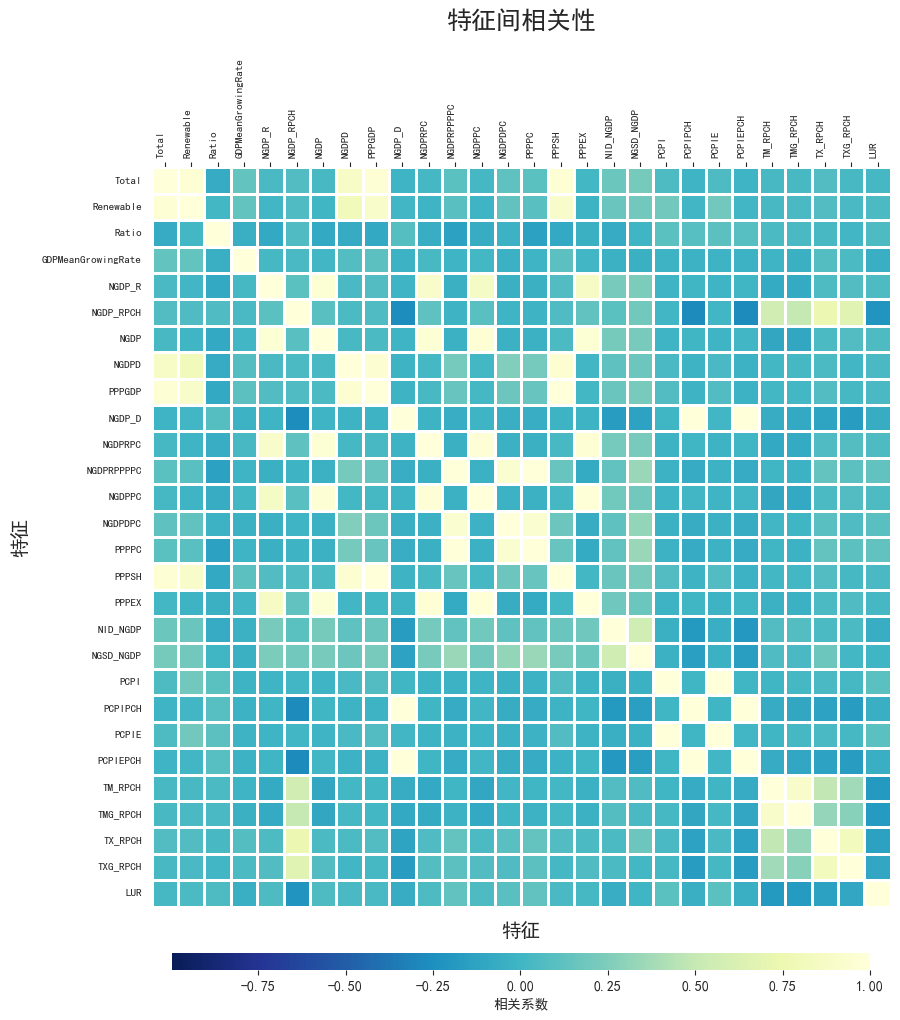

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
matplotlib.rc("font",family='SimHei')
matplotlib.rcParams['axes.unicode_minus']=False
# 调整图像大小
plt.figure(figsize=(15, 12))

# 绘制热力图
ax = sns.heatmap(df_corr, cmap="YlGnBu_r", linewidths=1, cbar_kws={'label': '相关系数', 'orientation': 'horizontal', 'pad': 0.05, 'aspect': 40, 'shrink': 0.6}, alpha=1, annot=False)

# 设置背景色
ax.set_facecolor('#001000')

# 去掉边框
for _, spine in ax.spines.items():
    spine.set_visible(False)

# 调整字体大小
ax.tick_params(axis='both', which='both', labelsize=12)

# 添加标题和标签
ax.set_title('特征间相关性', fontsize=18, pad=20)
ax.set_xlabel('特征', fontsize=14, labelpad=10)
ax.set_ylabel('特征', fontsize=14, labelpad=10)

# 调整方块大小和间距
ax.invert_yaxis()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right', fontsize=8)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, horizontalalignment='right', fontsize=8)
ax.set_ylim(len(df.columns), 0)
ax.set_xlim(0, len(df.columns))
ax.set_xticks([i+0.5 for i in range(len(df.columns))])
ax.set_yticks([i+0.5 for i in range(len(df.columns))])
ax.set_aspect('equal')

# 调整颜色条的位置和大小
# cbar = ax.collections[0].colorbar
# cbar.ax.tick_params(labelsize=12)
# cbar.ax.set_position([0.1, 0.95, 0.8, 0.03])

# 添加网格线
ax.xaxis.tick_top()
plt.grid(b=True, which='major', color='w', linestyle='-', axis='both')
plt.show()

对数据进行进一步探索：对数据集合使用归一化

In [70]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() #实例化
scaler = scaler.fit(df_total_clean) #fit，在这里本质是生成min(x)和max(x)
result = scaler.transform(df_total_clean) #通过接口导出结果
result

array([[1.57016201e-04, 5.18899807e-04, 8.93543201e-01, ...,
        3.79253443e-05, 6.97115681e-01, 6.25187467e-01],
       [2.44075737e-03, 6.52231609e-03, 7.37266744e-01, ...,
        8.23975551e-04, 6.95574493e-01, 4.95875736e-01],
       [6.79485604e-04, 2.47177525e-03, 1.00000000e+00, ...,
        4.02981497e-05, 6.93123164e-01, 3.59600964e-01],
       ...,
       [4.60403165e-04, 2.27804679e-04, 1.35693609e-01, ...,
        3.43339896e-04, 6.93358545e-01, 3.97268345e-01],
       [2.73532917e-02, 4.44342173e-03, 4.48756252e-02, ...,
        1.36221365e-04, 7.02057570e-01, 5.02196036e-01],
       [1.95699941e-03, 6.06471700e-03, 8.54705901e-01, ...,
        8.13799454e-06, 6.97041704e-01, 6.37024638e-01]])

取label

In [71]:
y = result[:,1]
y1 = result[:,2]

在矩阵总删除label所在列

In [72]:
x = np.delete(result,[0,1,2],axis=1)
x

array([[3.36597254e-02, 8.85389162e-05, 4.04637568e-01, ...,
        3.79253443e-05, 6.97115681e-01, 6.25187467e-01],
       [4.51681122e-02, 1.00658774e-04, 3.60483242e-01, ...,
        8.23975551e-04, 6.95574493e-01, 4.95875736e-01],
       [4.00188592e-02, 5.55479395e-05, 3.89945440e-01, ...,
        4.02981497e-05, 6.93123164e-01, 3.59600964e-01],
       ...,
       [2.30556031e-03, 1.45052226e-05, 3.24759678e-01, ...,
        3.43339896e-04, 6.93358545e-01, 3.97268345e-01],
       [1.16877846e-02, 2.94932337e-04, 3.52792933e-01, ...,
        1.36221365e-04, 7.02057570e-01, 5.02196036e-01],
       [1.56815811e-02, 9.46307882e-06, 3.98999740e-01, ...,
        8.13799454e-06, 6.97041704e-01, 6.37024638e-01]])

使用线性回归，在将所有经济指标作为自变量，分别对ratio字段(可再生能源在总能源开发利用中所占比例)以及Renewable字段（可再生能源的利用量（GWh））进行分析预测，并且显示决定系数

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
#2.将数据分为训练集和测试集
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y1,test_size=0.2,random_state=1)
linregTr=LinearRegression()
#4.模型训练
linregTr.fit(x_train,y_train)
#5.模型预测
y_train_pred=linregTr.predict(x_train)
y_test_pred=linregTr.predict(x_test)
#分别计算误差，确定是否过拟合；评估模型的泛化能力
from sklearn import metrics
train_err=metrics.mean_squared_error(y_train,y_train_pred)
test_err=metrics.mean_squared_error(y_test,y_test_pred)
print(train_err,"////",test_err)
#6.性能评估
predict_score=metrics.r2_score(y_test_pred,y_test)#性能评估，决定系数
print('The decision coeficient is:{:.2f}'.format(predict_score))

0.0713284569411332 //// 0.48108211245130256
The decision coeficient is:-0.27


In [74]:
#2.将数据分为训练集和测试集0.35
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.3,random_state=1)
linregTr=LinearRegression()
#4.模型训练
linregTr.fit(x_train,y_train)
#5.模型预测
y_train_pred=linregTr.predict(x_train)
y_test_pred=linregTr.predict(x_test)
#分别计算误差，确定是否过拟合；评估模型的泛化能力
from sklearn import metrics
train_err=metrics.mean_squared_error(y_train,y_train_pred)
test_err=metrics.mean_squared_error(y_test,y_test_pred)
print(train_err,"////",test_err)
#6.性能评估
predict_score=metrics.r2_score(y_test_pred,y_test)#性能评估，决定系数
print('The decision coeficient is:{:.2f}'.format(predict_score))

0.00021885791756609554 //// 0.006947711494746652
The decision coeficient is:0.47


使用神经网络模型对数据进行预测并输出预测准确程度

In [75]:
from sklearn.neural_network import MLPRegressor
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.3,random_state=1)
MLP = MLPRegressor(solver='lbfgs',alpha=1e-6,hidden_layer_sizes=(50,100,200,100,50),random_state=1)
MLP.fit(x_train,y_train)
predict_score=MLP.score(x_test,y_test)
print('The MLP Score is:{:.2f}'.format(predict_score))

The MLP Score is:0.37


In [76]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y1,test_size=0.3,random_state=1)
MLP.fit(x_train,y_train)
predict_score=MLP.score(x_test,y_test)
print('The MLP Score is:{:.2f}'.format(predict_score))

The MLP Score is:-0.30


D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
